<h1><b>Data analysis of relationship between Macro-Econmics and starting salary of graduates of different schools</b><h1>

<h3>Name: Li Yongjie</h3>
<h3>ADMIN NO: 2342377</h3>
<h3>Class: DAAA/FT/1B/01</h3>

<p>In this assignment, I will be looking at how macro-economics (Inflation, GDP, Unemployment Rate) affects the starting gross monthly median starting salary of graduates from different schools in University</p>
<hr>


## Importing necessary libraries and dataset

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(palette='pastel')
sns.set_style({'font.family': 'Times New Roman'})
import statsmodels.api as sm 
import statsmodels.formula.api as smf

# https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
gdpDf= pd.read_csv('./Data/world-gdp.csv',
                    header=2)

# https://tablebuilder.singstat.gov.sg/table/TS/M212971
inflationRateDf = pd.read_csv('./Data/singapore-inflation-rate.csv',
                              header=9, 
                              skipfooter=29,
                              na_values="na")

# https://www.macrotrends.net/countries/SGP/singapore/unemployment-rate#:~:text=Unemployment%20refers%20to%20the%20share,a%200.56%25%20decline%20from%202020.
unemploymentRateDf = pd.read_csv('./Data/singapore-unemployment-rate.csv',
                                 header=9)


GES_Df = pd.read_csv('./Data/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv', na_values='na')


C:\Users\yongj\AppData\Local\Temp\ipykernel_14304\2921758778.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  inflationRateDf = pd.read_csv('./Data/singapore-inflation-rate.csv',


In [109]:
# Set the style for plots
plt.style.use('seaborn-v0_8-darkgrid')

<hr>

# Exploratory Data Analysis
<hr>

### Text Based Analysis

In [110]:
# Creating function to get information from data
def get_info(df, name):
    print(60*"*" ,f"\nInformation on {name}", '\n' + "*"*60 + '\n') 
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset\n')
    print(f'The names of the columns are')
    for col in df.columns:
        print(f'- {col} ({df[col].dtypes}), na values: {df[col].isna().sum()}, unique values: {len(list(df[col].unique()))}')

In [111]:
get_info(gdpDf, "GDP")

************************************************************ 
Information on GDP 
************************************************************

There are 266 rows and 68 columns in this dataset

The names of the columns are
- Country Name (object), na values: 0, unique values: 266
- Country Code (object), na values: 0, unique values: 266
- Indicator Name (object), na values: 0, unique values: 1
- Indicator Code (object), na values: 0, unique values: 1
- 1960 (float64), na values: 140, unique values: 125
- 1961 (float64), na values: 139, unique values: 127
- 1962 (float64), na values: 138, unique values: 127
- 1963 (float64), na values: 138, unique values: 127
- 1964 (float64), na values: 138, unique values: 128
- 1965 (float64), na values: 126, unique values: 139
- 1966 (float64), na values: 123, unique values: 143
- 1967 (float64), na values: 120, unique values: 145
- 1968 (float64), na values: 115, unique values: 150
- 1969 (float64), na values: 115, unique values: 150
- 1970 (float6

In [112]:
get_info(inflationRateDf, "Inflation Rate")

************************************************************ 
Information on Inflation Rate 
************************************************************

There are 8 rows and 35 columns in this dataset

The names of the columns are
- Data Series (object), na values: 0, unique values: 5
- 2023  (float64), na values: 0, unique values: 8
- 2022  (float64), na values: 0, unique values: 8
- 2021  (float64), na values: 0, unique values: 8
- 2020  (float64), na values: 0, unique values: 8
- 2019  (float64), na values: 0, unique values: 5
- 2018  (float64), na values: 0, unique values: 8
- 2017  (float64), na values: 0, unique values: 7
- 2016  (float64), na values: 0, unique values: 8
- 2015  (float64), na values: 0, unique values: 8
- 2014  (float64), na values: 3, unique values: 6
- 2013  (float64), na values: 6, unique values: 3
- 2012  (float64), na values: 6, unique values: 3
- 2011  (float64), na values: 6, unique values: 3
- 2010  (float64), na values: 6, unique values: 3
- 2009  (flo

In [113]:
get_info(unemploymentRateDf, "Unemployment Rate")

************************************************************ 
Information on Unemployment Rate 
************************************************************

There are 32 rows and 4 columns in this dataset

The names of the columns are
- date (object), na values: 0, unique values: 32
-  Unemployment Rate (%) (float64), na values: 0, unique values: 32
-  Annual Change (float64), na values: 1, unique values: 28
-   (float64), na values: 32, unique values: 1


In [114]:
get_info(GES_Df, "Graduate Employment Survey")

************************************************************ 
Information on Graduate Employment Survey 
************************************************************

There are 1121 rows and 12 columns in this dataset

The names of the columns are
- year (int64), na values: 0, unique values: 9
- university (object), na values: 0, unique values: 6
- school (object), na values: 28, unique values: 68
- degree (object), na values: 0, unique values: 337
- employment_rate_overall (float64), na values: 89, unique values: 226
- employment_rate_ft_perm (float64), na values: 89, unique values: 393
- basic_monthly_mean (float64), na values: 89, unique values: 798
- basic_monthly_median (float64), na values: 89, unique values: 182
- gross_monthly_mean (float64), na values: 89, unique values: 796
- gross_monthly_median (float64), na values: 89, unique values: 237
- gross_mthly_25_percentile (float64), na values: 89, unique values: 175
- gross_mthly_75_percentile (float64), na values: 89, unique val

Dataset 1 - Gross Domestic Product Dataframe

In [115]:
gdpDf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN


Dataset 2 - Inflation Rate Data Frame

In [116]:
inflationRateDf.head()

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,MAS Core Inflation Measure (Index),109.274,104.918,100.769,99.845,100.0,98.966,97.327,95.933,95.076,...,72.736,72.376,72.091,70.997,69.744,68.246,66.562,65.398,64.359,62.094
1,Percent Change Over Corresponding Period Of ...,4.200,4.100,0.900,-0.200,1.0,1.700,1.500,0.900,0.500,...,0.500,0.400,1.500,1.800,2.200,2.500,1.800,1.600,3.600,NaN
2,Services Inflation Measure (Index),107.701,103.899,100.710,99.460,100.0,98.448,97.033,95.577,94.435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Percent Change Over Corresponding Period Of ...,3.700,3.200,1.300,-0.500,1.6,1.500,1.500,1.200,0.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Retail & Other Goods Inflation Measure (Index),101.656,99.354,97.387,98.501,100.0,100.140,98.769,98.577,98.304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset 3 - Unemployment Rate Dataframe

In [117]:
unemploymentRateDf.head()

,date,Unemployment Rate (%),Annual Change,
0,1991-12-31,2.18,NaN,NaN
1,1992-12-31,3.09,0.91,NaN
2,1993-12-31,3.07,-0.02,NaN
3,1994-12-31,3.03,-0.04,NaN
4,1995-12-31,3.30,0.27,NaN


Dataset - 4 Graduate Employment Survey

In [118]:
GES_Df.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557.0,3400.0,3615.0,3400.0,3000.0,4100.0
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494.0,3500.0,3536.0,3500.0,3100.0,3816.0


<hr>

### Manipulating Datasets

Since the intersect of all the year from each dataset is 2013-2021, we will have to subset the dataframes to only contain the range of year from 2013-2021

<u>Functions to check for outlier and replace with nan value</u>

In [119]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

def replace_outliers_with_nan(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    # Replace outliers with NaN
    data[outliers] = float('nan')
    return data

<hr>

### Preparing GDP Dataset

Since we want to know how GDP affects salary in Singapore, we will only be looking at the Worlds and Singapore's GDP and remove the other countries. In order to merge our dataset we will also need to convert the years into one column as well.

In [120]:
# Select only Singapore and World GDP Per Capita
gdp_filtered = gdpDf[gdpDf['Country Name'].isin(['Singapore', 'World'])]

# Since columns names contain str values we will have to subset the data using iloc
index_of_2015 = gdp_filtered.columns.get_loc('2013')
index_of_2021 = gdp_filtered.columns.get_loc('2021')

# Select year from 2013 to 2022, this will also remove unwanted columns such as country code, country name and indicator name 
gdp_filtered = gdp_filtered.iloc[:, index_of_2015:index_of_2021 + 1]

# Verify Changes made
gdp_filtered

,2013,2014,2015,2016,2017,2018,2019,2020,2021
208,3.075764e+11,3.148636e+11,3.079985e+11,3.190301e+11,3.432729e+11,3.768695e+11,3.768376e+11,3.483921e+11,4.237971e+11
259,7.771472e+13,7.983716e+13,7.528327e+13,7.651898e+13,8.148410e+13,8.654268e+13,8.777740e+13,8.525774e+13,9.752968e+13


Now that we have only selected the rows for Singapore and World we will need to convert the years from columns into rows by getting the transpose of the dataset.

In [121]:
# Conver year to column by getting the transpose and reseting index
gdp_filtered = gdp_filtered.T.reset_index()

# Rename the columns containing GDP values
gdp_filtered.rename(columns={208: 'Singapore_USD_Billion', 259: 'World_USD_Billion', "index": 'year'}, inplace=True)

# Convert the unit into billion for easier visualization
gdp_filtered[['Singapore_USD_Billion', 'World_USD_Billion']] = gdp_filtered[['Singapore_USD_Billion', 'World_USD_Billion']].div(10**9)

# Convert year to int value
gdp_filtered['year']=gdp_filtered['year'].astype(int)

# Verify Changes made
gdp_filtered

,year,Singapore_USD_Billion,World_USD_Billion
0,2013,307.576361,77714.723868
1,2014,314.863581,79837.156825
2,2015,307.998545,75283.270552
3,2016,319.030058,76518.978974
4,2017,343.272879,81484.101071
5,2018,376.869492,86542.678179
6,2019,376.837580,87777.403956
7,2020,348.392091,85257.737350
8,2021,423.797101,97529.676807


Now that we have prepared the GDP Dataframe we will look at the trend over the years to gain a better understanding of the dataset

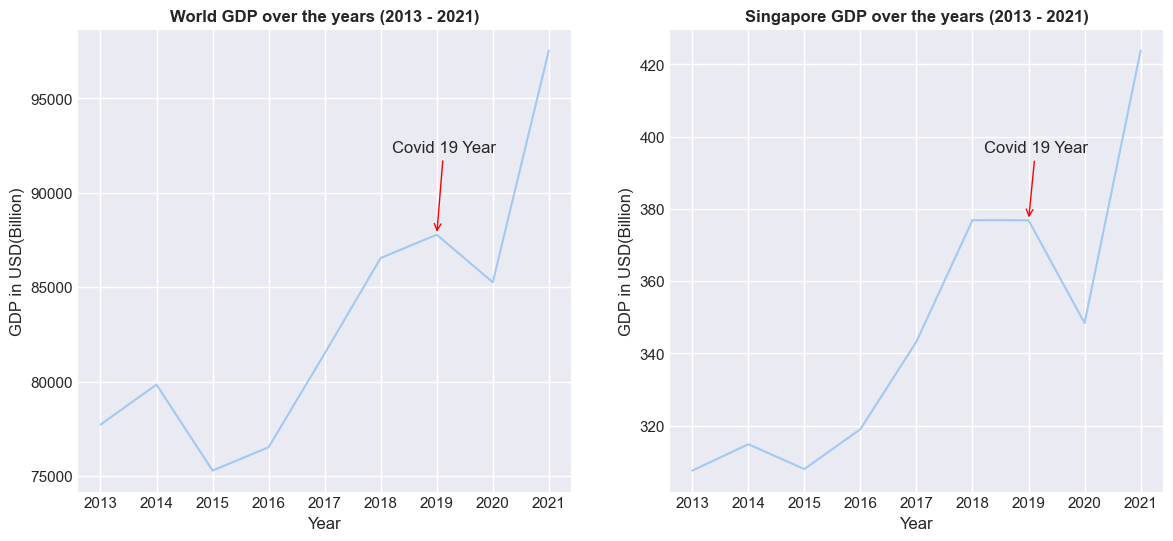

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

countries = ['World', 'Singapore']

# List of corresponding column names in gdp_filtered dataframes
columns = ['World_USD_Billion', 'Singapore_USD_Billion']

for i in range(len(countries)):
    # Create line plot for the GDP
    sns.lineplot(x='year', y=columns[i], data=gdp_filtered, ax=ax[i])
    ax[i].set_title(f'{countries[i]} GDP over the years (2013 - 2021)',
                    fontweight='bold')                 
    ax[i].set_ylabel('GDP in USD(Billion)')
    ax[i].set_xlabel('Year')

    # Get y-value of the year 2019 to position annotation
    value_2019 = gdp_filtered.loc[gdp_filtered['year'] == 2019, columns[i]].values[0]
    ax[i].annotate('Covid 19 Year', xy=(2019, value_2019), xytext=(2019-0.8, value_2019+value_2019*0.05),
                   arrowprops=dict(color='red', arrowstyle='->'))

plt.show()

<u>Observation</u> 

From the graph, we can see that the trend for GDP for both Singapore and the World are quite similar and are increasing exponantionally over the years from 2013 to 2021.
However, there was a dip after in both graphs 2019 which was most likely due to the Covid-19 pandemic in 2019

In [123]:
outliers_count = identify_outliers_iqr(gdp_filtered).sum()
print("Number of outliers in the entire dataset:", outliers_count, sep='\n')

Number of outliers in the entire dataset:
year                     0
Singapore_USD_Billion    0
World_USD_Billion        0
dtype: int64


There are no outliers to be handles in this dataset.

<hr>

### Preparing Inflation Dataset

In our analysis we found out that inflation dataset has years as columns and the inflation type in one column. Hence, we will have to manipulate the dataset to convert inflation type into columns and the year as one column.

In [124]:
# Set the Inflation Measure as the index and transpose to convert year into a column
inflationRateDf_filtered = inflationRateDf.set_index(['Data Series']).T

# Filter the dataset to only choose 2013 - 2021 and only choose the Measure of each inflation
inflationRateDf_filtered = inflationRateDf_filtered.iloc[2:11, [0,2,4,6]].sort_index(ascending=True).reset_index()

# Change the year from index to new column
inflationRateDf_filtered.sort_index(ascending=True).reset_index(inplace=True)

# Rename column from index to year and shorten the name of other cols
inflationRateDf_filtered.rename(columns={'index': 'year',
                                        'MAS Core Inflation Measure (Index)':"MAX_Core_Inflation", 
                                        'Services Inflation Measure (Index)': "Services_Inflation",
                                        'Retail & Other Goods Inflation Measure (Index)': 'Retail_OtherGoods_Inflation',
                                        'Electricity & Gas Inflation Measure (Index)': 'Electricty_Gas_Inflation'},
                                inplace=True)

# Convert year to int value
inflationRateDf_filtered['year'] = inflationRateDf_filtered['year'].astype(int)

# Verify changes made
inflationRateDf_filtered

Data Series,year,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,92.799,NaN,NaN,NaN
1,2014,94.607,93.602,98.245,116.547
2,2015,95.076,94.435,98.304,99.649
3,2016,95.933,95.577,98.577,87.893
4,2017,97.327,97.033,98.769,95.831
5,2018,98.966,98.448,100.140,105.006
6,2019,100.000,100.000,100.000,100.000
7,2020,99.845,99.460,98.501,91.638
8,2021,100.769,100.710,97.387,93.026


In [125]:
outliers_count = identify_outliers_iqr(inflationRateDf_filtered).sum()
print(outliers_count)

Data Series
year                           0
MAX_Core_Inflation             0
Services_Inflation             0
Retail_OtherGoods_Inflation    0
Electricty_Gas_Inflation       1
dtype: int64


In this dataset, there is one outlier in Electricity_Gas_Inflation and since we only have 9 rows, dropping it would mean that more than 10% of the data in the row is dropped.

 So, we will replace it with NaN first and handle the missing values along those missing values in 2013.

In [126]:
inflationRateDf_filtered['Electricty_Gas_Inflation'] = replace_outliers_with_nan(inflationRateDf_filtered['Electricty_Gas_Inflation'])

outliers_count = identify_outliers_iqr(inflationRateDf_filtered).sum()
print(outliers_count)

Data Series
year                           0
MAX_Core_Inflation             0
Services_Inflation             0
Retail_OtherGoods_Inflation    0
Electricty_Gas_Inflation       0
dtype: int64


C:\Users\yongj\AppData\Local\Temp\ipykernel_14304\3750700040.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = float('nan')


<u>Boxplot to check for outliers after dropping:</u>

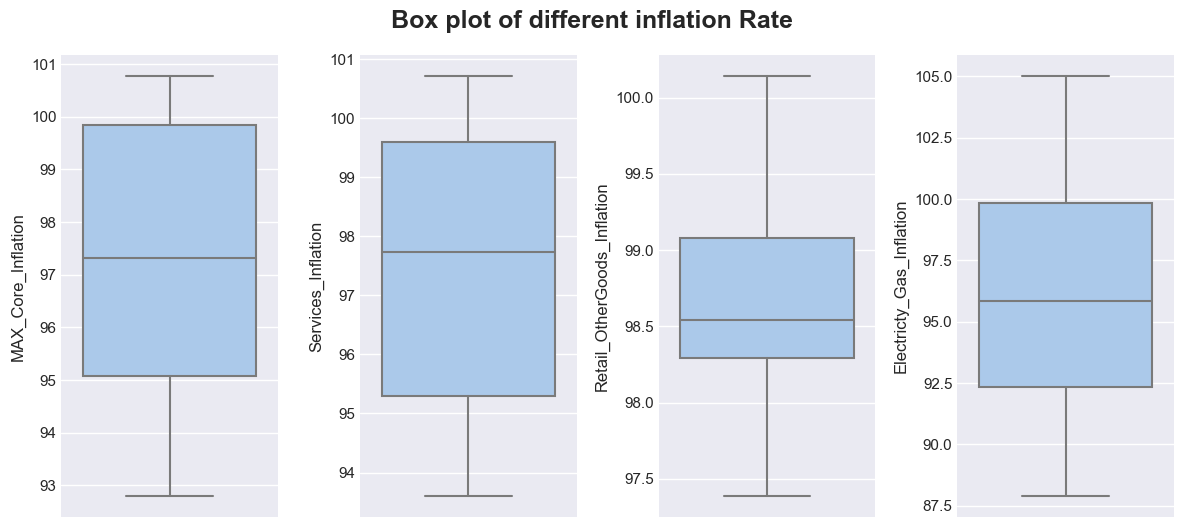

In [127]:
fig, ax = plt.subplots(1,4, figsize=(12,5))

cols = inflationRateDf_filtered.drop(columns='year')
for i, column in enumerate(cols):
    sns.boxplot(y=cols[column], ax=ax[i])

plt.tight_layout()
plt.suptitle("Box plot of different inflation Rate", y=1.05, fontweight='bold', fontsize=18)
plt.show()

Since there are missing values in 2013 for Services Inflation Measure, Retail & Other Goods Inflation Measure and Electricity & Gas inflation Measure(+2014), we will be using a simple linear regression model to predict and fill in the missing values.

In [128]:
inflationRateDf_filtered

Data Series,year,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,92.799,NaN,NaN,NaN
1,2014,94.607,93.602,98.245,NaN
2,2015,95.076,94.435,98.304,99.649
3,2016,95.933,95.577,98.577,87.893
4,2017,97.327,97.033,98.769,95.831
5,2018,98.966,98.448,100.140,105.006
6,2019,100.000,100.000,100.000,100.000
7,2020,99.845,99.460,98.501,91.638
8,2021,100.769,100.710,97.387,93.026


In [129]:
# Create traing data
train_inflation = inflationRateDf_filtered.dropna()

#  Function to predict value for 2013
def predictValues(column_name, year):
    # Creating the model
    model = smf.ols(f"{column_name} ~ year + MAX_Core_Inflation" ,data = train_inflation).fit()

    # if model is able to explain more than 50% of the variance in the data we will use in to predict the year
    if model.rsquared > 0.5:
        predictions = model.predict(inflationRateDf_filtered[['year', 'MAX_Core_Inflation']])

        # Update values in the DataFrame for the year 2013
        inflationRateDf_filtered.loc[inflationRateDf_filtered['year'] == year, column_name] = predictions

    print(f"Model rsquared value {model.rsquared}")

In [130]:
predictValues('Services_Inflation', 2013)

Model rsquared value 0.9947987761715014


In [131]:
predictValues('Retail_OtherGoods_Inflation', 2013)

Model rsquared value 0.8840603534414325


In [132]:
predictValues('Electricty_Gas_Inflation', 2013)
predictValues('Electricty_Gas_Inflation', 2014)


Model rsquared value 0.6503028739349546
Model rsquared value 0.6503028739349546


In [133]:
# Check changes made
inflationRateDf_filtered

Data Series,year,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,92.799,92.089226,98.148846,92.645216
1,2014,94.607,93.602000,98.245000,99.784212
2,2015,95.076,94.435000,98.304000,99.649000
3,2016,95.933,95.577000,98.577000,87.893000
4,2017,97.327,97.033000,98.769000,95.831000
5,2018,98.966,98.448000,100.140000,105.006000
6,2019,100.000,100.000000,100.000000,100.000000
7,2020,99.845,99.460000,98.501000,91.638000
8,2021,100.769,100.710000,97.387000,93.026000


<hr>

### Preparing Unemployment Dataset

This data set is simpler to handle as it only contains 4 columns, date, Unemployment Rate(%), Annual Change and an unammed column. 

The date is in the formate of YYYY-12-31, so we will need to refromat it by creating a new column called year which taking the first 4 index of date col.

Then we will only select year column and Unemployment rate as the other columns are redunden in our analysis.

In [134]:
# Get rid of last column which is unamed when loading csv
unemploymentRateDf_filtered = unemploymentRateDf.iloc[-10:-1, :-1].reset_index()

# Create new column year which converts date from YYYY-MM-DD
unemploymentRateDf_filtered['year'] = unemploymentRateDf_filtered['date'].str[:4]
unemploymentRateDf_filtered=unemploymentRateDf_filtered[['year',' Unemployment Rate (%)']]

unemploymentRateDf_filtered.rename(columns={' Unemployment Rate (%)': 'Unemployment_rate'}, inplace=True)


# Convert year to int value
unemploymentRateDf_filtered['year'] = unemploymentRateDf_filtered['year'].astype(int)

# Verify changes made
unemploymentRateDf_filtered

,year,Unemployment_rate
0,2013,3.860
1,2014,3.740
2,2015,3.790
3,2016,4.080
4,2017,4.200
5,2018,3.641
6,2019,3.100
7,2020,4.100
8,2021,3.540


<u>Plotting a line graph to view Unemployment Rate over the years</u>

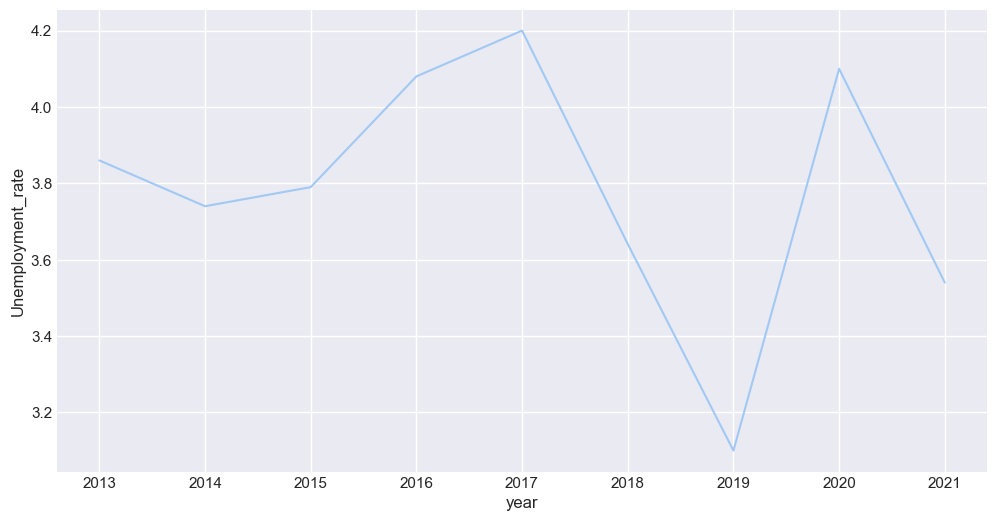

In [135]:
plt.figure(figsize=(12,6))
sns.lineplot(unemploymentRateDf_filtered, x='year', y='Unemployment_rate')
plt.show()

<u>Observation</u>

We can see that the unemployment rate is fluctuating, it was increasing slowly after 2014 and decreased steadily from 2017 to 2019 but started increasing again after which we could be due to could be due to Covid-19 as well

In [136]:
outliers_count = identify_outliers_iqr(unemploymentRateDf_filtered).sum()
print(outliers_count)

year                 0
Unemployment_rate    0
dtype: int64


<hr>

### Preparing Graduate Employment Survey Dataset

In this data set there are many things to account for:
<ul>
<li>Some university do not have data on degree or school for all the years</li>
<li>There are missing values in some rows</li>
<li>The names of schools varies based on university</li>
</ul>

Hence I will be handling the dataset by: 
<ol>
    <li>Dropping NaN values</li>and selecting  
    <li>Renaming the uni and schools based on keywords </li>
    <li>Grouping the degrees by their school and university and getting the median gross monthly median</li>
    <li>Selecting thoses schools and university with years from 2013 to 2021</li>
</ol>

<u>1. Dropping Nan Values</u>

In [137]:
# Drop Na Values
GES_Df_nona = GES_Df.dropna()

# Get List of school and university
print(GES_Df_nona['university'].unique())
print(GES_Df_nona['school'].unique())

['Nanyang Technological University' 'National University of Singapore'
 'Singapore Management University' 'Singapore Institute of Technology'
 'Singapore University of Social Sciences']
['College of Business (Nanyang Business School)' 'College of Engineering'
 'College of Humanities, Arts & Social Sciences' 'College of Sciences'
 'National Institute of Education (NIE)'
 'Faculty of Arts & Social Sciences' 'NUS Business School'
 'School of Computing' 'Faculty of Dentistry'
 'School of Design & Environment' 'Faculty of Engineering'
 'Faculty of Law' 'YLL School of Medicine' 'Faculty of Science'
 'School of Accountancy (4-years programme) *'
 'School of Business (4-years programme) *'
 'School of Economics (4-years programme) *'
 'School of Information Systems (4-years programme) *'
 'School of Social Sciences (4-years programme) *'
 'School of Law (4-years programme) *'
 'School of Accountancy (4-year programme) *'
 'School of Business (4-year programme) *'
 'School of Economics (4-year 

<u>2. Creating Function to rename school and university</u>

In [138]:
def rename_school(school_name):
    # Map the school based on keywords
    if 'Arts' in school_name or 'Humanities' in school_name:
        return 'Arts & Humanities'
    elif 'Design' in school_name or 'Environment' in school_name:
        return 'Design & Environment'
    elif 'Social Sciences' in school_name or 'Education' in school_name:
        return 'Social Sciences & Education'
    elif 'Computing' in school_name or 'Information Systems' in school_name:
        return 'Information Technology'
    elif 'Engineering' in school_name:
        return 'Engineering'
    elif 'Law' in school_name:
        return 'Law'
    elif 'Business' in school_name or 'Economics' in school_name or 'Accountancy' in school_name:
        return 'Business'
    elif 'Medicine' in school_name or 'Dentistry' in school_name or 'Nursing' in school_name:
        return 'Medicine'
    elif 'Science' in school_name:
        return 'Science'
    else:
        return 'Other'

def rename_uni(uni_name):
    if uni_name == 'Nanyang Technological University':
        return 'NTU'
    elif uni_name == 'National University of Singapore':
        return 'NUS'
    elif uni_name == 'Singapore Management University':
        return 'SMU'
    elif uni_name == 'Singapore Institute of Technology':
        return 'SIT'
    else: 
        return 'SUSS'
    
# Applying the function to the dataframe
GES_Df_nona['school'] = GES_Df_nona['school'].apply(rename_school)
GES_Df_nona['university'] = GES_Df_nona['university'].apply(rename_uni)

C:\Users\yongj\AppData\Local\Temp\ipykernel_14304\2115659518.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GES_Df_nona['school'] = GES_Df_nona['school'].apply(rename_school)
C:\Users\yongj\AppData\Local\Temp\ipykernel_14304\2115659518.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GES_Df_nona['university'] = GES_Df_nona['university'].apply(rename_uni)


<u>3. Grouping by university and school by year</u>

In [139]:

# Grouping data by university and year
GES_Df_nona = GES_Df_nona.groupby(['university', 'school', 'year'])[['gross_monthly_median']].median()

<u>4. Select school with all years from 2013 - 2021<u/>

In [140]:
# Group by school and count the number of entries for each school
school_counts = GES_Df_nona.groupby(level=['university', 'school']).size()

# Get the schools with entries for all years from 2015 to 2021
schools_with_all_years = school_counts[school_counts == 9].index

GES_Df_filtered = GES_Df_nona.reset_index()

# Filter the DataFrame based on schools_with_all_years
GES_Df_filtered = GES_Df_filtered[GES_Df_filtered[['university', 'school']].
                                  apply(tuple, axis=1).
                                  isin(schools_with_all_years)]

GES_Df_filtered.reset_index(inplace=True, drop=True)

# Verify dataset
GES_Df_filtered

,university,school,year,gross_monthly_median
0,NTU,Business,2013,3175.0
1,NTU,Business,2014,3200.0
2,NTU,Business,2015,3485.0
3,NTU,Business,2016,3400.0
4,NTU,Business,2017,3450.0
...,...,...,...,...
139,SMU,Social Sciences & Education,2017,3465.0
140,SMU,Social Sciences & Education,2018,3405.0
141,SMU,Social Sciences & Education,2019,3500.0
142,SMU,Social Sciences & Education,2020,3505.0


<u>Creating a fucntion to plot gross median salary by Hue</u>

In [141]:
def plotAvgGrossMonthlyMedianByHue(variable):
    plt.figure(figsize=(14, 8))

    sns.lineplot(data=GES_Df_filtered, 
                x='year', 
                y='gross_monthly_median',
                hue=f'{variable}',
                marker='o',
                palette='husl')

    plt.ylabel('Median Gross Monthly Median Salary of School', fontsize = '15')
    plt.xlabel('Year', fontsize = '15')
    plt.title(f'Median Gross Monthly Median Salary of {variable} over the years (2013 - 2021)', fontsize = '20', fontweight ='bold')
    plt.legend(title=f'{variable}', loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

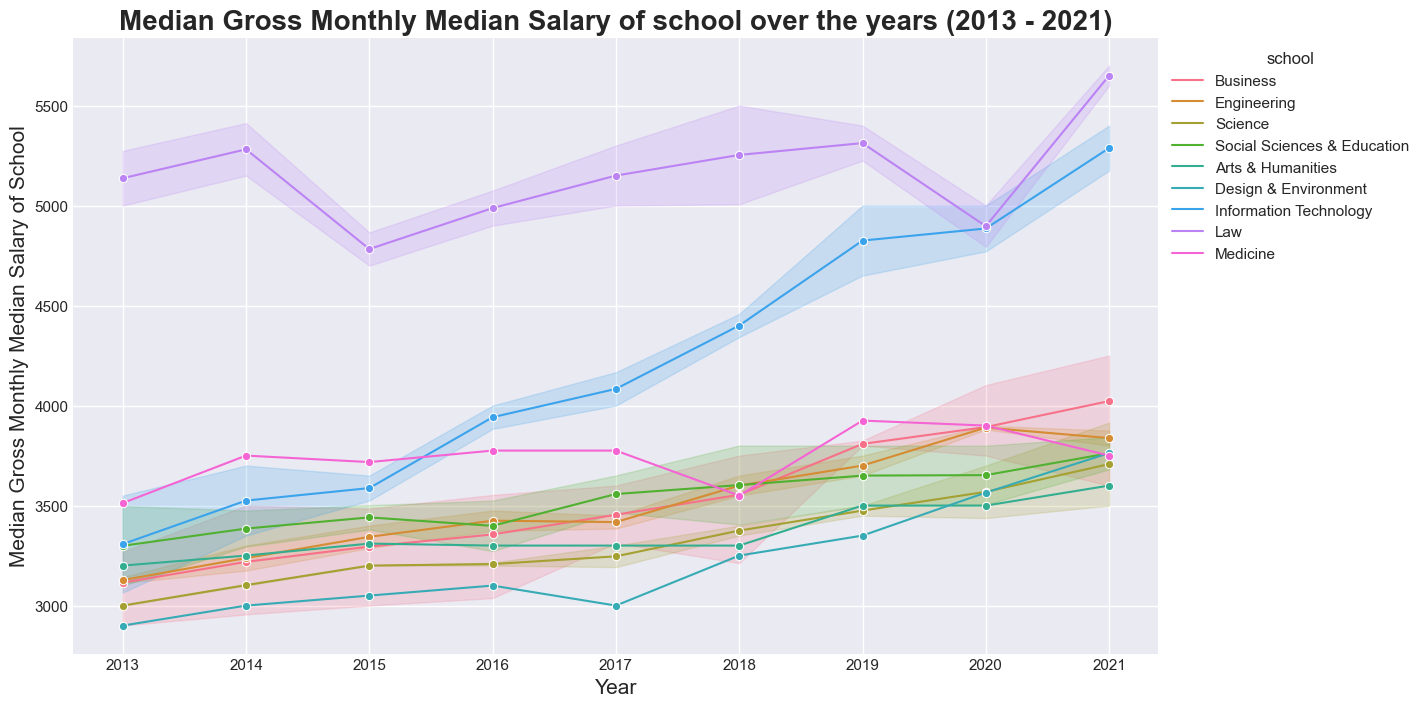

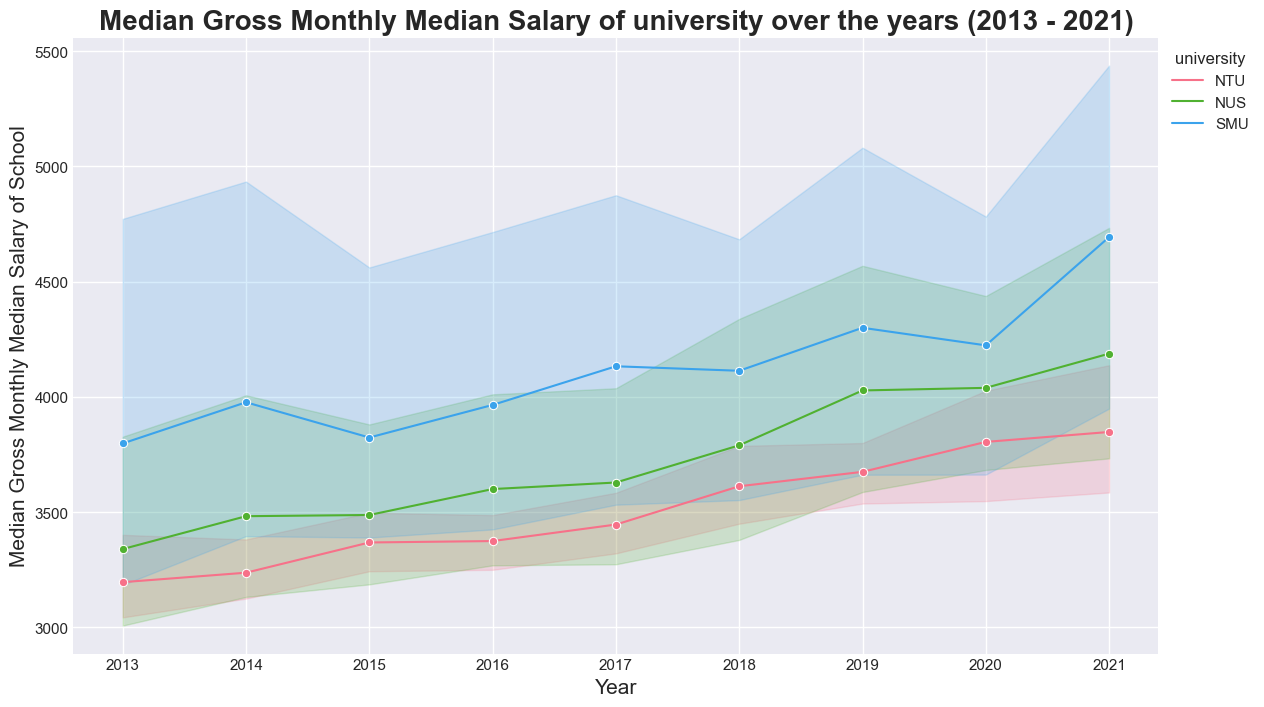

In [142]:
plotAvgGrossMonthlyMedianByHue('school')
plotAvgGrossMonthlyMedianByHue('university')

<u>Observation
</u>

From the trends, we can see that the medan gross monthly median over the years for both school and universtiy has been increasing over the years, similar to GDP

The highest paying school is law which has been consistently high over the years while Information technology has been increasing the most over the yearsto about $5250 by 2021 while the otherss are around $3500 to $4000

<hr> 

Now I will plot a qq plot the see the to see the skewness of the gross monthly median

In [143]:
# Function to create QQ Plot
def hist_and_qq_plot(data, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(data, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')

    # Q-Q plot
    sm.qqplot(data, line='s', ax=ax[1])
    ax[1].set_title('Q-Q Plot')

    # Add main title
    fig.suptitle(f'{title}', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

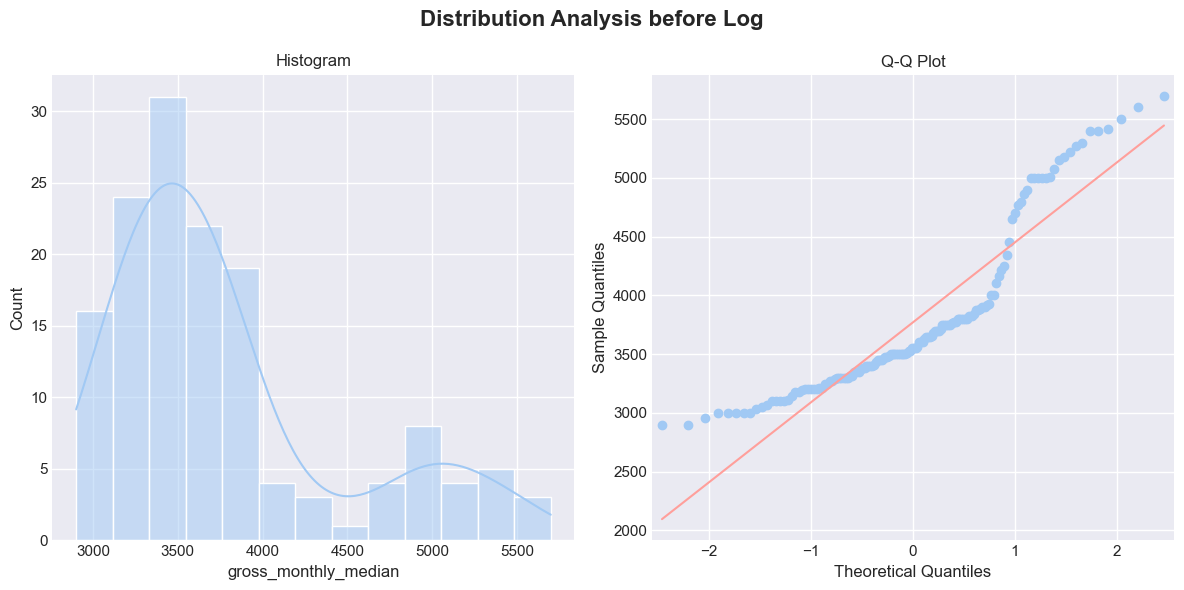

In [144]:
hist_and_qq_plot(GES_Df_filtered['gross_monthly_median'],"Distribution Analysis before Log")

As we can see, the distrubution is right skewed in the histograme and does not align nicely with the line in the QQ Plot. Hence, we will try to log transform to scale the data and see if there is any improvement

Then we will create a simple multplie linear regression to see how a model will perfrom with our current gross monthly median

In [145]:
multipleLinearRegModel = smf.ols(f"gross_monthly_median ~ C(school) + C(university)+ year", data = GES_Df_filtered).fit()
multipleLinearRegModel.summary()
print(f"RSquared Value before Log: {multipleLinearRegModel.rsquared}")
print(f"Params before Log: {multipleLinearRegModel.params}")

RSquared Value before Log: 0.8879554753820841
Params before Log: Intercept                                  -191904.327546
C(school)[T.Business]                          114.979167
C(school)[T.Design & Environment]             -142.500000
C(school)[T.Engineering]                       102.320023
C(school)[T.Information Technology]            816.565394
C(school)[T.Law]                              1772.954282
C(school)[T.Medicine]                          377.222222
C(school)[T.Science]                           -86.096644
C(school)[T.Social Sciences & Education]        95.135417
C(university)[T.NUS]                           -88.304398
C(university)[T.SMU]                           -36.212963
year                                            96.854167
dtype: float64


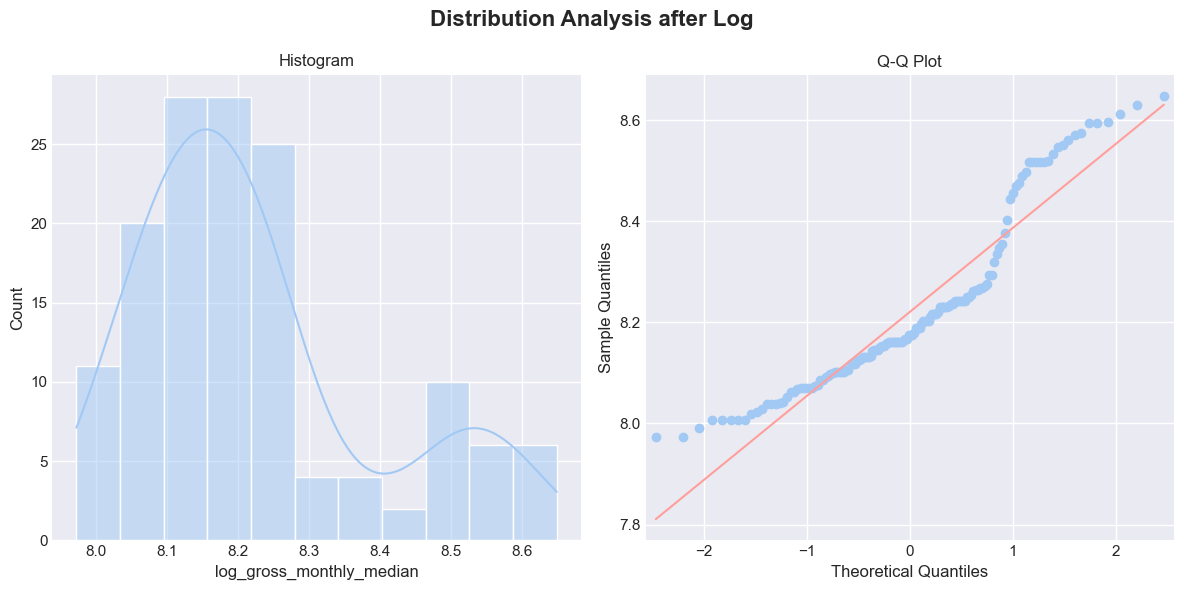

In [146]:
GES_Df_filtered['log_gross_monthly_median'] = np.log(GES_Df_filtered['gross_monthly_median'])
hist_and_qq_plot(GES_Df_filtered['log_gross_monthly_median'], "Distribution Analysis after Log")

In [147]:
multipleLinearRegModel = smf.ols(f"log_gross_monthly_median ~ C(school) + C(university)+ year", data = GES_Df_filtered).fit()
multipleLinearRegModel.rsquared
print(f"RSquared Value before Log: {multipleLinearRegModel.rsquared}")
print(f"Params after Log: {multipleLinearRegModel.params}")

RSquared Value before Log: 0.8868896074165107
Params after Log: Intercept                                  -44.142682
C(school)[T.Business]                        0.027966
C(school)[T.Design & Environment]           -0.046071
C(school)[T.Engineering]                     0.027644
C(school)[T.Information Technology]          0.203228
C(school)[T.Law]                             0.419258
C(school)[T.Medicine]                        0.106445
C(school)[T.Science]                        -0.027319
C(school)[T.Social Sciences & Education]     0.025402
C(university)[T.NUS]                        -0.026217
C(university)[T.SMU]                        -0.008990
year                                         0.025924
dtype: float64


After log scaling the data, the is visually no improvement in the skewness of the data and alignment with the line of equality, and looking at the rsquared before and after there is not much change so we will not be using the log scale

In [148]:
GES_Df_filtered.drop(columns='log_gross_monthly_median', inplace=True)



I will also create a new dataframe called average salary which takes the median of all the university and schools and group the data by year to get the median gross monthly median of all the degrees in the year

In [149]:
average_salary = pd.DataFrame(GES_Df_filtered.groupby('year')['gross_monthly_median'].median().astype(int))
average_salary.reset_index(inplace=True)

average_salary

,year,gross_monthly_median
0,2013,3158
1,2014,3297
2,2015,3400
3,2016,3437
4,2017,3457
5,2018,3600
6,2019,3800
7,2020,3852
8,2021,3858


<hr>

## Merging the datasets

Now that we have prepared all our datasets, we can get our final dataframe easily by merging them together by using inner join on the year

In [150]:
datasets = [GES_Df_filtered, gdp_filtered, unemploymentRateDf_filtered, inflationRateDf_filtered]

final_df = datasets[0]

for df in datasets[1:]:
    final_df = pd.merge(final_df, df, on='year', how='inner')

final_df

,university,school,year,gross_monthly_median,Singapore_USD_Billion,World_USD_Billion,Unemployment_rate,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,NTU,Business,2013,3175.0,307.576361,77714.723868,3.86,92.799,92.089226,98.148846,92.645216
1,NTU,Engineering,2013,3112.5,307.576361,77714.723868,3.86,92.799,92.089226,98.148846,92.645216
2,NTU,Science,2013,3000.0,307.576361,77714.723868,3.86,92.799,92.089226,98.148846,92.645216
3,NTU,Social Sciences & Education,2013,3498.0,307.576361,77714.723868,3.86,92.799,92.089226,98.148846,92.645216
4,NUS,Arts & Humanities,2013,3200.0,307.576361,77714.723868,3.86,92.799,92.089226,98.148846,92.645216
...,...,...,...,...,...,...,...,...,...,...,...
139,NUS,Science,2021,3915.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
140,SMU,Business,2021,4217.5,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
141,SMU,Information Technology,2021,5175.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
142,SMU,Law,2021,5700.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000


In [151]:
# Concatenate 'university' and 'school' columns
final_df['university'].str.cat(final_df['school'], sep=' - ').unique()

array(['NTU - Business', 'NTU - Engineering', 'NTU - Science',
       'NTU - Social Sciences & Education', 'NUS - Arts & Humanities',
       'NUS - Business', 'NUS - Design & Environment',
       'NUS - Engineering', 'NUS - Information Technology', 'NUS - Law',
       'NUS - Medicine', 'NUS - Science', 'SMU - Business',
       'SMU - Information Technology', 'SMU - Law',
       'SMU - Social Sciences & Education'], dtype=object)

We have 9 schools from 3 different universities that have years from 2013 to 2021

Now I will also merge the average dataframe with the other datasets to get the average of all the years and compare it to the macroeconomic factor

In [152]:
datasets_schools = [average_salary, gdp_filtered, unemploymentRateDf_filtered, inflationRateDf_filtered]

avg_df = datasets_schools[0]

for df in datasets[1:]:
    avg_df = pd.merge(avg_df, df, on='year', how='inner')

avg_df

,year,gross_monthly_median,Singapore_USD_Billion,World_USD_Billion,Unemployment_rate,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,3158,307.576361,77714.723868,3.860,92.799,92.089226,98.148846,92.645216
1,2014,3297,314.863581,79837.156825,3.740,94.607,93.602000,98.245000,99.784212
2,2015,3400,307.998545,75283.270552,3.790,95.076,94.435000,98.304000,99.649000
3,2016,3437,319.030058,76518.978974,4.080,95.933,95.577000,98.577000,87.893000
4,2017,3457,343.272879,81484.101071,4.200,97.327,97.033000,98.769000,95.831000
5,2018,3600,376.869492,86542.678179,3.641,98.966,98.448000,100.140000,105.006000
6,2019,3800,376.837580,87777.403956,3.100,100.000,100.000000,100.000000,100.000000
7,2020,3852,348.392091,85257.737350,4.100,99.845,99.460000,98.501000,91.638000
8,2021,3858,423.797101,97529.676807,3.540,100.769,100.710000,97.387000,93.026000


### <u>Creating a corrlation matrix to see the correlation coefficeint of each column</u>

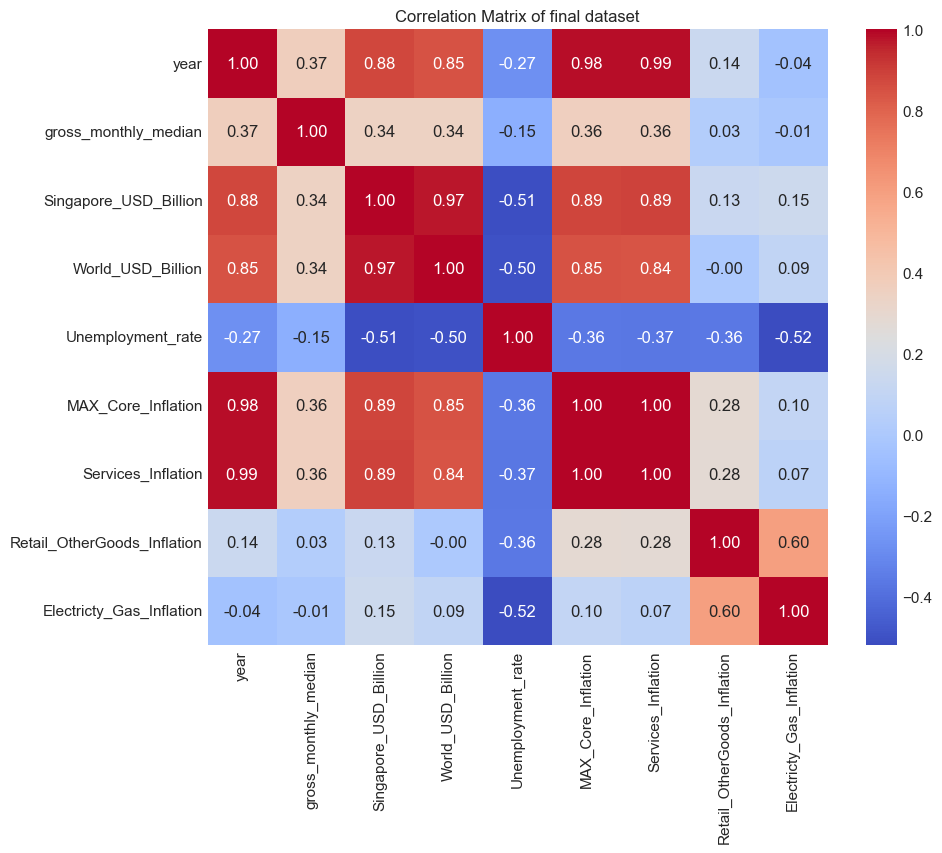

In [153]:
# Compute the correlation matrix
categorical_data = ['university', 'school']
correlation_matrix = final_df.drop(columns=categorical_data).corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 

# Add title
plt.title('Correlation Matrix of final dataset')

# Display the plot
plt.show()

<u>Observation:</u>

Gross monthly median has a weak correlation with both GDP columns as well as MAX Core and Services Inflation with coefficients greater than 0.3

Since there is still a correlation means that we can expect that these macro economics will likely affect Gross Monthly Median of graduates. 

From the line graph we can observe both GDP and Salary increase over the years which may suggest that GDP has a positive correlation with Graduate Gross Monthly Median. 

However, unemployment rate, electricity and gas infltion and retail and other goods inflation has a low negative coeffcient value with gross monthly median. This suggests that these macro economic factors may not affect Graduat gross monthly median 

<hr>

## Regression

<hr>
<br>
Now, I will create a simple regression model for each column against gross monthly median to see the RSquared Value to see if the model can explain the variance based on each macro economic factor.

If the modal can explain more than 50% of the variance where RSquared > 0.5, I will append the column which will be used for my final multi regression model

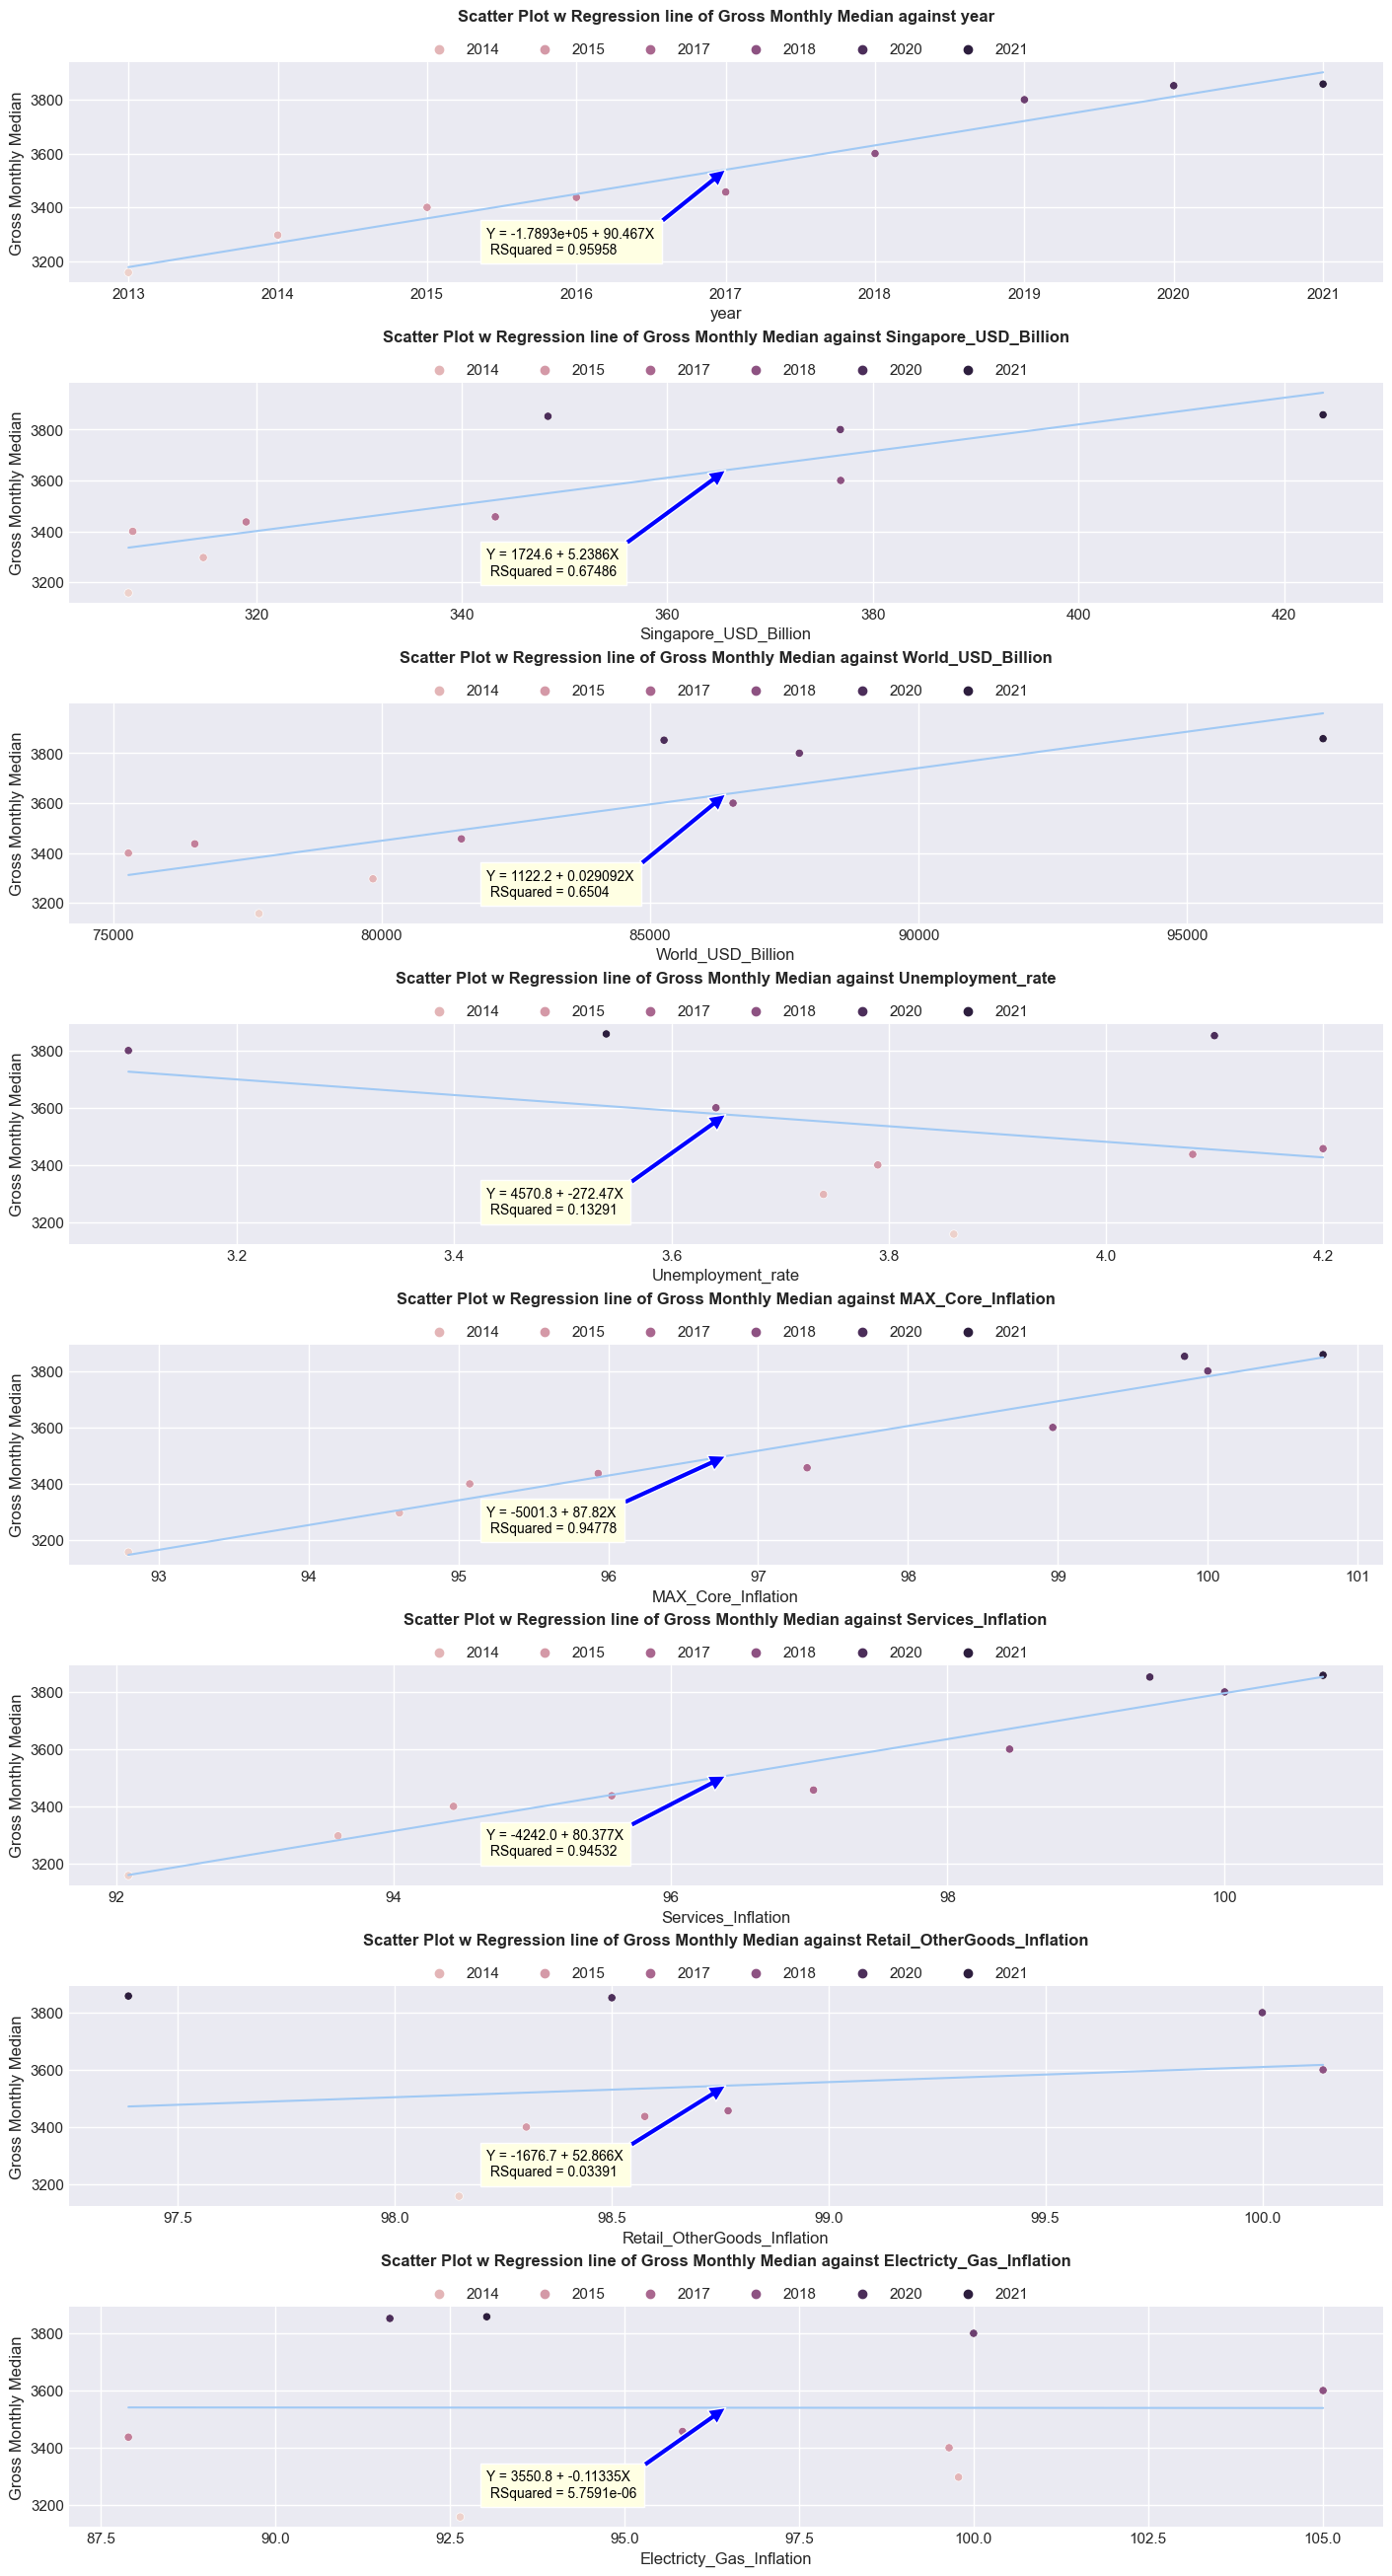

In [154]:
good_columns = []
columns = avg_df.drop(columns='gross_monthly_median')

fig, ax = plt.subplots(8, 1, figsize=(14, 26), constrained_layout=True)

for i, column in enumerate(columns):
    x = avg_df[column]
    y = avg_df['gross_monthly_median']
    ax[i].set_xlabel(column)  # Set x-label as the column name
    ax[i].set_ylabel('Gross Monthly Median')  # Set y-label
    sns.scatterplot(data=avg_df, x=column, y='gross_monthly_median', hue='year', ax=ax[i])

    # Create best fit line
    m, c = np.polyfit(x, y, deg=1)

    # Plot the best fit line
    sns.lineplot(data=avg_df, x=x, y=c+m*x, ax=ax[i])

    # Train the model
    model = smf.ols(f"gross_monthly_median ~ {column}", data = avg_df).fit()

    # Get the the linear equation fo the line
    linearModEq = f"Y = {model.params[0]:.5} + {model.params[1]:.5}X\n RSquared = {model.rsquared:.5}"
    
    # Append columns that have can explain more than 50% of variance
    if(model.rsquared >= 0.5):
        good_columns.append([column, model.rsquared, model.params])

    x_range = x.max() - x.min()
    y_range = y.max() - y.min()
    x_middle = (x.max() + x.min())/2
    x_position = x.min() + 0.3 * x_range
    y_position = y.min() + 0.1 * y_range
    
    ax[i].annotate(linearModEq, 
                    xy=(x_middle, c+m*x_middle), 
                    xytext=(x_position, y_position),
                    size=10, 
                    arrowprops=dict(facecolor='blue'),
                    color='black',
                    bbox={'facecolor': '#ffffe3','pad':5})
    
    ax[i].legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=6)
    ax[i].set_title(f'Scatter Plot w Regression line of Gross Monthly Median against {column}', pad=30, fontweight='bold')

plt.show()

In [155]:
good_columns

[['year',
  0.9595773886422172,
  Intercept   -178931.377778
  year             90.466667
  dtype: float64],
 ['Singapore_USD_Billion',
  0.6748637470243044,
  Intercept                1724.629301
  Singapore_USD_Billion       5.238613
  dtype: float64],
 ['World_USD_Billion',
  0.6503989202407188,
  Intercept            1122.225708
  World_USD_Billion       0.029092
  dtype: float64],
 ['MAX_Core_Inflation',
  0.9477765702365136,
  Intercept            -5001.339404
  MAX_Core_Inflation      87.820316
  dtype: float64],
 ['Services_Inflation',
  0.9453169193819279,
  Intercept            -4242.012446
  Services_Inflation      80.377314
  dtype: float64]]

<u>Observation</u>

As expected, the columns that had more than 0.3 coefficient value in the correlation matrix had greater than 0.5 RSquared value while those that didn't, have less than 0.5 RSquared value

From the coefficient, we can see how the macro economics affect the gross monhtly median salary:
<ol>
    <li>Singapore GDP USD Billion: Every 1 unit increase in SDG GPD Billion the gross monthly median increases by 5</li>
    <li>World GDP USD Billion: Every 1 unit increase in USed GPD Billion the gross monthly median increases by 0.029092</li>
    <li>MAX_Core_Inflation: Every 1 unit increase in MAX_Core_Inflation the gross monthly median increases by 87.820316</li>
    <li>Services_Inflation: Every 1 unit increase in Services_Inflation the gross monthly median increases by 80.377314</li>
</ol>

<hr>

## Creating multiple linear Regression model

In [156]:
multipleLinearRegModel = smf.ols(f"gross_monthly_median ~ C(school) + C(university) + year + Singapore_USD_Billion + World_USD_Billion + MAX_Core_Inflation + Services_Inflation", data = final_df).fit()
print(multipleLinearRegModel.params)
print(multipleLinearRegModel.summary())

Intercept                                  -107905.989686
C(school)[T.Business]                          114.979167
C(school)[T.Design & Environment]             -142.500000
C(school)[T.Engineering]                       102.320023
C(school)[T.Information Technology]            816.565394
C(school)[T.Law]                              1772.954282
C(school)[T.Medicine]                          377.222222
C(school)[T.Science]                           -86.096644
C(school)[T.Social Sciences & Education]        95.135417
C(university)[T.NUS]                           -88.304398
C(university)[T.SMU]                           -36.212963
year                                            53.806587
Singapore_USD_Billion                           -3.440255
World_USD_Billion                                0.027656
MAX_Core_Inflation                             -70.632902
Services_Inflation                              88.744114
dtype: float64
                             OLS Regression Results      

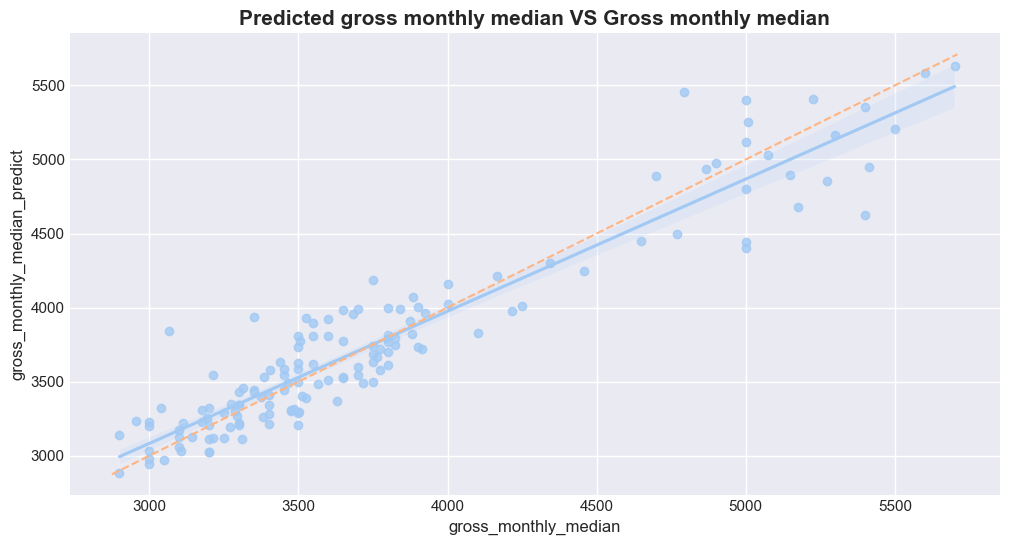

In [157]:
plt.figure(figsize=(12, 6))

## Visually comparing the actual gross_monthly_median and the gross_monthly_median
final_df['gross_monthly_median_predict'] = multipleLinearRegModel.predict() # Predict the value based on orginal testdata
final_df['residual'] = multipleLinearRegModel.resid

# Plotting the regression graph over 
sns.regplot(x='gross_monthly_median', y='gross_monthly_median_predict', data=final_df, fit_reg=True)

# Plotting the diagonal line - if the prediction is correct x = y
line_coords = np.arange(final_df[['gross_monthly_median', 'gross_monthly_median_predict']].min().min()-10,
                        final_df[['gross_monthly_median', 'gross_monthly_median_predict']].max().max()+10)
plt.plot(line_coords, line_coords, linestyle='--')
plt.title("Predicted gross monthly median VS Gross monthly median",
          fontweight='bold',
          fontsize=15)
plt.show()

<u>Observation  </u>

Our model performs weel with a Rsquared value of 0.892 and the predicted value fits well against the actual value

<hr>

## Testing the model

Trying to predict starting salary of Information Technology School of NUS vs NTU in 2030

In [158]:
uni_to_predict = ['NUS', 'SMU', 'NTU']
for uni in uni_to_predict:
    prediction_data = {
        'school': 'Business',  # Provide the value for the school variable
        'university': uni,  # Provide the value for the university variable
        'year': 2030,  # Set the year to 2030
        'Singapore_USD_Billion': 500.797,  # value for Singapore_USD_Billion
        'World_USD_Billion': 107529.676,  # value for World_USD_Billion
        'MAX_Core_Inflation': 103.710,  # value for MAX_Core_Inflation
        'Services_Inflation': 102.01  # value for Services_Inflation
    }

    # Use the fitted model to predict the gross_monthly_median for the provided data
    predicted_gross_monthly_median = multipleLinearRegModel.predict(prediction_data)

    print(f'Predicted gross monthly median for {uni} - Business for the year 2030: ', predicted_gross_monthly_median[0])

final_df[['university', 'year', 'gross_monthly_median']][(final_df['year'] == 2021) & (final_df['school'] == 'Business')]

Predicted gross monthly median for NUS - Business for the year 2030:  4326.52965795061
Predicted gross monthly median for SMU - Business for the year 2030:  4378.621093135793
Predicted gross monthly median for NTU - Business for the year 2030:  4414.834056098785


,university,year,gross_monthly_median
128,NTU,2021,4250.0
133,NUS,2021,3600.0
140,SMU,2021,4217.5


In [159]:
# Define the universities to predict
uni_to_predict = ['NUS', 'SMU', 'NTU']

# Initialize lists to store data
predicted_values = []

# Iterate over universities to predict
for uni in uni_to_predict:
    # Prediction data for the current university
    prediction_data = {
        'school': 'Business',
        'university': uni,
        'year': 2030,
        'Singapore_USD_Billion': 500.797,
        'World_USD_Billion': 107529.676,
        'MAX_Core_Inflation': 103.710,
        'Services_Inflation': 102.01
    }

    # Predict the gross_monthly_median for the provided data
    predicted_gross_monthly_median = multipleLinearRegModel.predict(prediction_data)

    # Append data to lists
    predicted_values.append(predicted_gross_monthly_median[0])

# Create a new DataFrame
predicted_df = pd.DataFrame({
    'university': uni_to_predict,
    'year': 2030,
    'gross_monthly_median': predicted_values
})

predicted_df

,university,year,gross_monthly_median
0,NUS,2030,4326.529658
1,SMU,2030,4378.621093
2,NTU,2030,4414.834056


In [160]:
# Filter the DataFrame for the years 2021 and 2030
data_2021 = final_df[['university','year','gross_monthly_median']][(final_df['school'] == 'Business')]
concatenated_df = pd.concat([predicted_df, data_2021])
concatenated_df


,university,year,gross_monthly_median
0,NUS,2030,4326.529658
1,SMU,2030,4378.621093
2,NTU,2030,4414.834056
0,NTU,2013,3175.000000
5,NUS,2013,2900.000000
12,SMU,2013,3269.500000
16,NTU,2014,3200.000000
21,NUS,2014,2956.000000
28,SMU,2014,3500.000000
32,NTU,2015,3485.000000


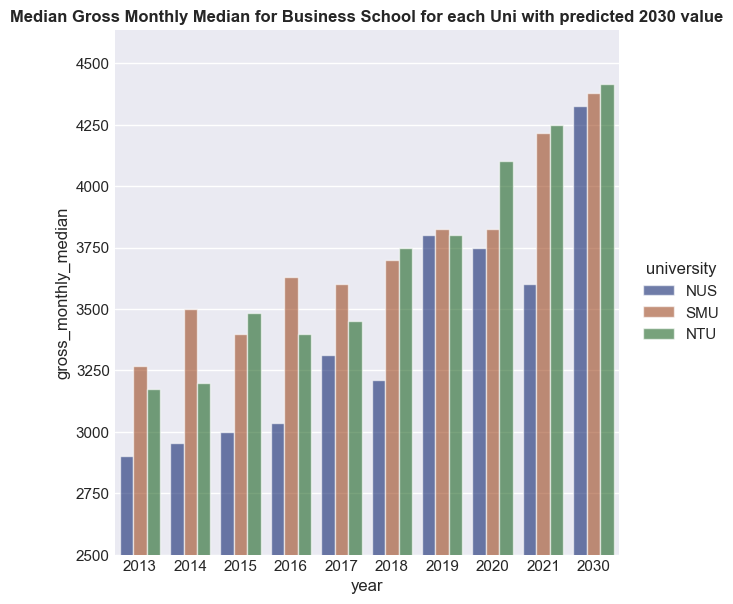

In [161]:
sns.catplot(
    data=concatenated_df, kind="bar",
    x="year", y="gross_monthly_median", hue="university",
    palette="dark", alpha=.6, height=6
).despine(left=True)

plt.title("Median Gross Monthly Median for Business School for each Uni with predicted 2030 value", fontweight='bold')
plt.ylim(2500)
plt.show()


As expected the salary increased when all our macro economic factors increased, NUS Had the highest increase while the other two universtiy also had a slight increase but NTU still has the highest gross monthly median salary

# Final evaluation

We have succesfully created a multiple linear regression taht can predict Graduate gross monthly median starting salary based on macro economics

WE found out that GDP and Max Core inflation and services inflation has a postivie correlation with the gross monthly median slarary while unemployment and the others do not really affect the gross monthly median starting salary